# Foundations of Data Science
## Homework 5 

Student Name: Harshit Srivastava

Student Netid: hs3500
***

### Part 1: Critique this plan (8 points)
1\. After a few beers your CIO invited his buddy from Green Berry consulting to propose a project using data mining to improve the targeting of the new service that you have been a principal in developing. The service has been quite successful so far, being marketed over the last 6 months via your ingenious, and very inexpensive, word-of-mouth campaign. You've already garnered a pretty large customer base without any targeting, and you've been seeing this success as your best stepping stone to bigger and better things in the firm. 

After some reflection, you've decided that your best course of action is to play a key role in ensuring the success of this data mining project as well. You agree with your CIO's statement in a meeting with Green Berry, that accurate targeting might cost-effectively expand your audience substantially to consumers that word-of-mouth would not reach. You accept that what Green Berry says about the characteristics of your service is accurate.

Based on what we have covered in class, identify the four most serious weaknesses/flaws in this abridged version of Green Berry's proposal, and suggest how to ameliorate them.  Your answer should be 4 bullet points, each comprising 2-4 sentences: 1-2 sentences stating each weakness, and 1-2 sentences suggesting a better alternative.  Maximal credit will be given when the 4 points are as independent as possible.


```
--- -------------------------------------------------------------------------- ---
                            Targeted Audience Expansion             
                      Prepared by Green Berry Consulting, Inc.

Your problem is to expand the audience of your new service.  We (Green Berry) have a 
large database of consumers who can be targeted.  We will build a predictive model 
to estimate which of these consumers are the most likely to adopt the product, and
then target them with the special offer you have designed.

More specifically, we will build a logistic regression (LR) model to predict adop-
tion of the service by a consumer, based on the data on your current customers of 
this service.  The model will be based on their demographics and their usage of 
the service. We believe that logistic regression is the best choice of method be-
cause it is a tried-and-true statistical modeling technique, and we can easily 
interpret the coefficients of the model to infer whether the attributes are stat-
istically significant, and whether they make sense. If they are statistically sig-
nificant and they do make sense, then we can have confidence that the model will 
be accurate in predicting service uptake. We will apply the model to our large 
database of consumers, and select out those who have not yet subscribed and whom
the LR model predicts to be the most likely to subscribe.  To these we will send 
the targeted offer. As this is a fixed-profit-per-customer service, this also 
will in effect rank them by expected profit.
--- -------------------------------------------------------------------------- ---
```

This abridged version of the proposal seems a bit vague at some points but even after best assumptions, there are some flaws in the technique proposed:

1\. The approach is - use the database of all customers and train it against a model so that it learns the features of positive and negative class. The thing they missed out here is - the model is initially trained on certain negative classes and then they will extract the same negative class features and ask the algorithm to predict the possible outcome. In this case, they are training the model against subscribers and non-subscribers and then trying to predict the outcome of non-subscribers from the same dataset, they are training the model on the same data that they are going to test it against which will not give the desired results. Better alternative would be to make use of another dataset that contains important imformation about the citizens of that area and then map it to the current database 

2\. The reason given for choosing Logistic Regression model is "because it is tried-and-tested and easy to interpret" - this does not seem convincing enough and comes off as a trial-and-error approach. Better approach would be to consider all statistical learning models and then chose the one that fits the dataset and answers the question accurately. There is no point having confidence in one of the statistical learning algorithms, instead they should have confidence in their choice of the model.  

3\. They have mentioned that they will look at the coefficients and infer whether attributes are statistically significant in order to evaluate the model. Without an accuracy metric, it will be difficult to decide whether to trust the predictions or not. Better alternative to this approach would be to use metrics like Accuracy, AUC, ROC curve etc. and measure the performance of the system based on that. This way they can also choose to use another model if the accuracy score of Logistic Regression model is below par.

4\. It is mentioned that they plan to rank the customers based on expected profit but haven't mentioned any other approaches. In order to extract the probability ranking, Logistic Regression model won't be useful as the algorithm defines a boundary condition and categorizes data based on that condition. Better alternative would be Naive Bayes algorithm which would generate joint probability estimates which can be used in ranking the customers. 

### Part 2: Sentiment analysis (12 points)

In this assignment we will be looking at a directed, signed network regarding Wikipedia editors who want to become an administrator. In order for this to happen, a request for adminship (RfA) is submitted, either by the candidate or by another community member. Subsequently, any Wikipedia member may cast a supporting, neutral, or opposing vote.

The dataset and further description can be found here:
https://snap.stanford.edu/data/wiki-RfA.html

In sum, nodes represent Wikipedia members and edges represent votes. Each entry in the dataset also includes text of a comment associated with the vote.



1\. Convert the data into a pandas `DataFrame()`, which will have one column for each of the data attributes, SRC, TGT, etc. (3 points) 

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
%matplotlib inline

In [99]:
# Reading the file
with open("/Users/harshitsrivastava/Desktop/Data/rfa_all.NL-SEPARATED.txt") as f:
    lines = f.readlines()
    
# Creating a dictionary
df = {}
for i in lines:
    # Removing bad lines from the data
    if i == "\n" or i == " ":
        continue
        
    # Splitting data into key-value pairs
    i = i.strip()
    key, value = i.split(":", 1)
    
    # Storing the values in the form of key, value pairs
    df.setdefault(key, [])
    # Appending the Key with multiple values
    df[key].append(value)

# Converting the dictionary to DataFrame
df = pd.DataFrame(df)

In [100]:
df.head()

,DAT,RES,SRC,TGT,TXT,VOT,YEA
0,"23:13, 19 April 2013",1,Steel1943,BDD,'''Support''' as co-nom.,1,2013
1,"01:04, 20 April 2013",1,Cuchullain,BDD,'''Support''' as nominator.--,1,2013
2,"23:43, 19 April 2013",1,INeverCry,BDD,'''Support''' per noms.,1,2013
3,"00:11, 20 April 2013",1,Cncmaster,BDD,'''Support''' per noms. BDD is a strong contri...,1,2013
4,"00:56, 20 April 2013",1,Miniapolis,BDD,"'''Support''', with great pleasure. I work wit...",1,2013


2\. Using the VOT column as the target variable, code the values as -1 or 0  as '0' and 1 to stay as '1'. (1 point)


In [101]:
# replacing the rows with -1 with 0
df['VOT'] = df['VOT'].replace('-1', '0')

3\. Put all of the text (TXT column) into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. (2 points)

In [102]:
# Creating the Feature and Target variables
X = df['TXT']
Y = df['VOT']

# Splitting the data using train_test_split function from scikit learn
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

4\. Create a binary `CountVectorizer()` and `TfidfVectorizer()`. Use the original single words as well as bigrams. Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. (3 points)

In [103]:
# Initializing Binary CountVectorizer, using single words as well as bigrams, using 'english' stop words list
binary_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2), stop_words='english', encoding=u'utf-8')

# Fitting the training data
binary_vectorizer.fit(X_train)

# Transforming the datasets
df_train_binary = binary_vectorizer.transform(X_train)
df_test_binary = binary_vectorizer.transform(X_test)

# Initializing TfIdf Vectorizer, using single words as well as bigrams, using 'english' stop words list
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')

# Fitting the training data
tfidf_vectorizer.fit(X_train)

# Transforming the datasets
df_train_tfidf = tfidf_vectorizer.transform(X_train)
df_test_tfidf = tfidf_vectorizer.transform(X_test)

In [104]:
# Sample Output
list(binary_vectorizer.vocabulary_.keys())[0:20]

[u'unsupportable',
 u'wikipedia surely',
 u'spidern',
 u'count_edits',
 u'administrators focus',
 u'helpful wp',
 u'writers make',
 u'using know',
 u'policy saying',
 u'time swing',
 u'temperment desired',
 u'doing demonstrate',
 u'names carry',
 u'eta eta',
 u'quickly possible',
 u'creator respect',
 u'nom add',
 u'ips feel',
 u'indicate stevie',
 u'1st concern']

5\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both the binary and tfidf feature sets. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph. (3 points)

(0, 1)

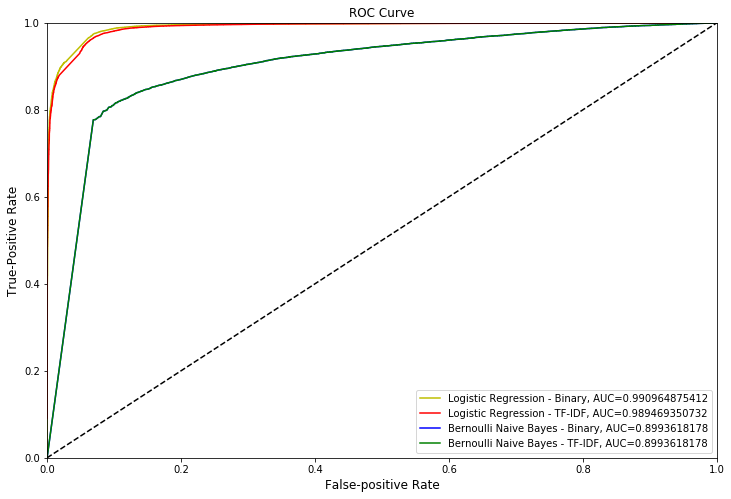

In [105]:
# Initializing the different models 
LR_model_binary = LogisticRegression()
LR_model_tfidf = LogisticRegression()
NB_model_binary = BernoulliNB()
NB_model_tfidf = BernoulliNB()

# Changing the string values to int
Y_test = np.array(Y_test).astype(int)

# 1 --- LOGISTIC REGRESSION MODEL
### Logistic Regression model for Binary Count Vectorizer
LR_model_binary.fit(df_train_binary, Y_train)
LR_binary_pred = LR_model_binary.predict_proba(df_test_binary)[:,1]
LR_binary_AUC = metrics.roc_auc_score(Y_test, LR_binary_pred)
LR_bin_fpr, LR_bin_tpr, LR_bin_thresh = metrics.roc_curve(Y_test, LR_model_binary.predict_proba(df_test_binary)[:,1])

### Logisitc Regression model for TF-IDF Vectorizer
LR_model_tfidf.fit(df_train_tfidf, Y_train)
LR_tfidf_pred = LR_model_tfidf.predict_proba(df_test_tfidf)[:,1]
LR_tfidf_AUC = metrics.roc_auc_score(Y_test, LR_tfidf_pred)
LR_tfidf_fpr, LR_tfidf_tpr, LR_tfidf_thresh = metrics.roc_curve(Y_test, LR_model_tfidf.predict_proba(df_test_tfidf)[:,1])

# 2 -- BERNOULLI NAIVE BAYES MODEL
### Bernoulli Naive Bayes model for Binary Vector Count Vectorizer
NB_model_binary.fit(df_train_binary, Y_train)
NB_binary_pred = NB_model_binary.predict_proba(df_test_binary)[:,1]
NB_binary_AUC = metrics.roc_auc_score(Y_test, NB_binary_pred)
NB_bin_fpr, NB_bin_tpr, NB_bin_thresh = metrics.roc_curve(Y_test, NB_model_binary.predict_proba(df_test_binary)[:,1])

### Bernoulli Naive Bayes model for TF-IDF Vectorizer
NB_model_tfidf.fit(df_train_binary, Y_train)
NB_tfidf_pred = NB_model_tfidf.predict_proba(df_test_tfidf)[:,1]
NB_tfidf_AUC = metrics.roc_auc_score(Y_test, NB_tfidf_pred)
NB_tfidf_fpr, NB_tfidf_tpr, NB_tfidf_thresh = metrics.roc_curve(Y_test, NB_model_tfidf.predict_proba(df_test_tfidf)[:,1])

# PLOTTING THE ROC CURVE
### Setting the figure size
plt.figure(figsize=[12, 8])

### Plotting the different models using different colors and using label to depict the AUC score
plt.plot(LR_bin_fpr, LR_bin_tpr, label='Logistic Regression - Binary, AUC='+str(LR_binary_AUC), color = 'y')
plt.plot(LR_tfidf_fpr, LR_tfidf_tpr, label='Logistic Regression - TF-IDF, AUC='+str(LR_tfidf_AUC), color = 'r')
plt.plot(NB_bin_fpr, NB_bin_tpr, label='Bernoulli Naive Bayes - Binary, AUC='+str(NB_binary_AUC), color = 'b')
plt.plot(NB_tfidf_fpr, NB_tfidf_tpr, label='Bernoulli Naive Bayes - TF-IDF, AUC='+str(NB_tfidf_AUC), color = 'g')
### Plotting the 45 degree line
plt.plot([0, 1], [0, 1],'k--')
### Labelling the axes, adding Title and limiting the window
plt.xlabel("False-positive Rate", fontsize = 'large')
plt.ylabel("True-Positive Rate", fontsize = 'large')
plt.title("ROC Curve", fontsize = 'large')
plt.legend()
plt.xlim([0, 1])
plt.ylim([0, 1])

<p>
<span style="color:red">
As we can see from the figure, Logistic Regression has better AUC scores for both the methods. This may be due to the fact that Naive Bayes makes an assumption that the input features are conditionally independent of each other given the output label. NB considers all feature weights independently so when there is correlation between the features, NB double-counts the weights and doubles the influence on the decision. Logistic Regression model on the other hand considers all features together, so, when there is correlation between the features, it compensates by splitting the difference and lowering the weights. Here, in text data, there is high correlation amongst the features themselves which is in effect lowering down the accuracy of NB model as it is over-estimating the correlated features, LR on the other hand is facing no issues in this case and performing better than NB and getting a near perfect score.

</span>
</p>

### Part 3: Network analysis and visualization (10 points)

In this part of the assignment we will analyze basic characteristics of the same Wikipedia network used in Part 2.


1. Prepare an edgefile for importing. First, map the node names to integer values. For data values, let's just start with the VOT column value. (2 points)

In [106]:
# Adding Edge Attributes to DataFrame to depict colors (Red - Negative vote or result | Green - Positive vote or Result)
df.loc[df['VOT'] == '0', 'color_VOT'] = 'r'
df.loc[df['VOT'] == '1', 'color_VOT'] = 'g'

df.loc[df['RES'] == '-1', 'color_RES'] = 'r'
df.loc[df['RES'] == '1', 'color_RES'] = 'g'


In [107]:
import networkx as nx

# Converting DataFrame to a Directional Graph object
g = nx.from_pandas_dataframe(df, 'SRC', 'TGT', edge_attr='color_VOT', create_using=nx.DiGraph())

# Mapping node names to integer values
g2 = nx.convert_node_labels_to_integers(g)

# Writing an edgelist
nx.write_edgelist(g2, "Wiki.edgelist")

2\. Now load the data as a graph object called 'Gwik'. (1 point)

In [108]:
Gwik = nx.read_edgelist("Wiki.edgelist")

3\. Confirm the number of nodes and edges in the graph object. (2 points)

In [109]:
print "Number of Edges: {}".format(Gwik.number_of_edges())
print "Number of Nodes: {}".format(Gwik.number_of_nodes())

Number of Edges: 181999
Number of Nodes: 11381


4\. Compute the degree, betweneess and closeness centrality measures for the graph. Are all 3 meaningful here given what you know about the nodes and edges? (2 points)

In [274]:
print "Degree Centrality: {}".format(list(nx.degree_centrality(Gwik).values())[0:5])
print "Betweenness Centrality: {}".format(list(nx.betweenness_centrality(Gwik).values())[0:5])
print "Closeness Centrality: {}".format(list(nx.closeness_centrality(Gwik).values())[0:5])

Degree Centrality: [8.787346221441125e-05, 0.0018453427065026364, 8.787346221441125e-05, 8.787346221441125e-05, 0.005536028119507909]
Betweenness Centrality: [0.0, 1.7155474849406898e-06, 0.0, 0.0, 0.00026038207892244006]
Closeness Centrality: [0.2624720345042323, 0.3110139382344903, 0.2672114210575749, 0.2769058568751977, 0.35464971328845674]


1\. The Degree Centrality tends to be higher for the "important" nodes which have many nodes connected to them. The Degree Centrality values appear meaningful as the values are very close to 0 which is reasonable in this dataset where the nodes are not that densely connected and there are very few "important" nodes with multiple edges connected to them.

2\. Betweennes Centrality is the measure of how often a node appears in the shortest path between randomly chosen vertices. The values are either 0 or very close to 0 which implies that most nodes are stand-alone nodes or don't have any connection other than the one which is making them stay in the network. 

3\. Closeness centrality is the average length of shortest distance between a node and all other nodes in the graph. A value of 0.2 - 0.3 obtained from top 5 nodes further implies that the network is not densely connected and has same Closeness Centrality for all the nodes where most of the shortest-paths may have been obtained by direct connection of nodes. 

5\. Now visualize the graph. How do you visualize the edges to communicate vote values? (1 point)

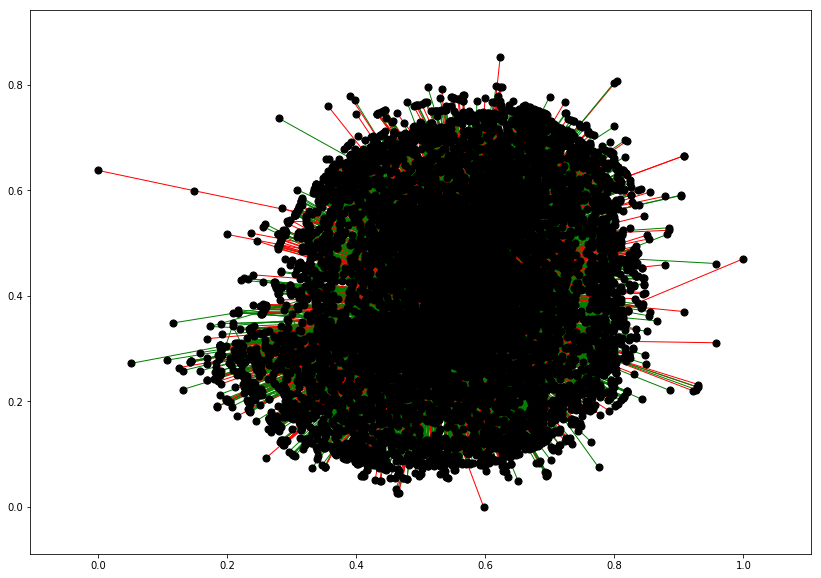

In [115]:
# Figure size
plt.figure(figsize=(14, 10))

# Collecting edge data for coloring from 'color_VOT' attribute of Gwik graph object
edges = Gwik.edges()
colors_VOT = [Gwik[u][v]['color_VOT'] for u,v in edges]

# Plotting the network
nx.draw_networkx(Gwik, node_color='k', with_labels=False, node_size=50, arrows=True, edge_color=colors_VOT)

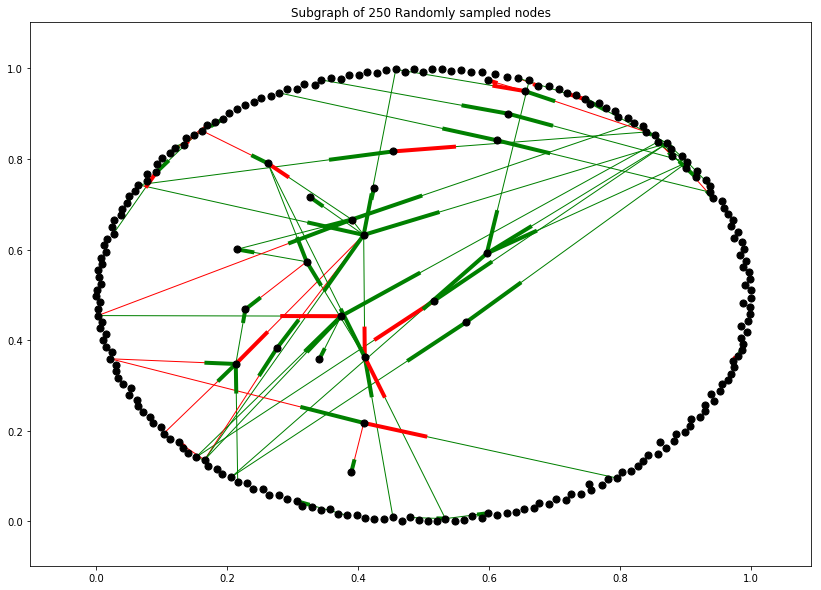

In [51]:
### Plotting Subgraph of 250 Random samples to clearly view the network

plt.figure(figsize=(14, 10))

# Generating 250 random integers and creating a subgraph based on those integers
small_list = list(np.random.randint(0, len(Gwik.nodes()), size = 250))
Hwik = g2.subgraph(small_list)

# Collecting edge data for coloring from 'color_VOT' attribute of Gwik graph object
edges = Hwik.edges()
colors_VOT = [Hwik[u][v]['color_VOT'] for u,v in edges]

# Plotting the network
nx.draw_networkx(Hwik, node_color='k', with_labels=False, node_size=50, arrows=True, edge_color=colors_VOT)
plt.title("Subgraph of 250 Randomly sampled nodes")

<p>
<span style="color:red">
The vote values are represented by the edges - red colored edge represents a negative vote and green colored edge represents a positive vote. The width of the edge appears more at one end - this depicts the direction of the vote i.e. direction from Voter to Votee (the person who requested for Adminship). Therefore, the receiver of the votes has multiple edges connected which shows that he received votes from multiple people. 
</span>
</p>

6\. Now also add in the resolution of the vote into your graph, and a new visualization of the network. Explain your choice of how to visually show this new information? (2 points)

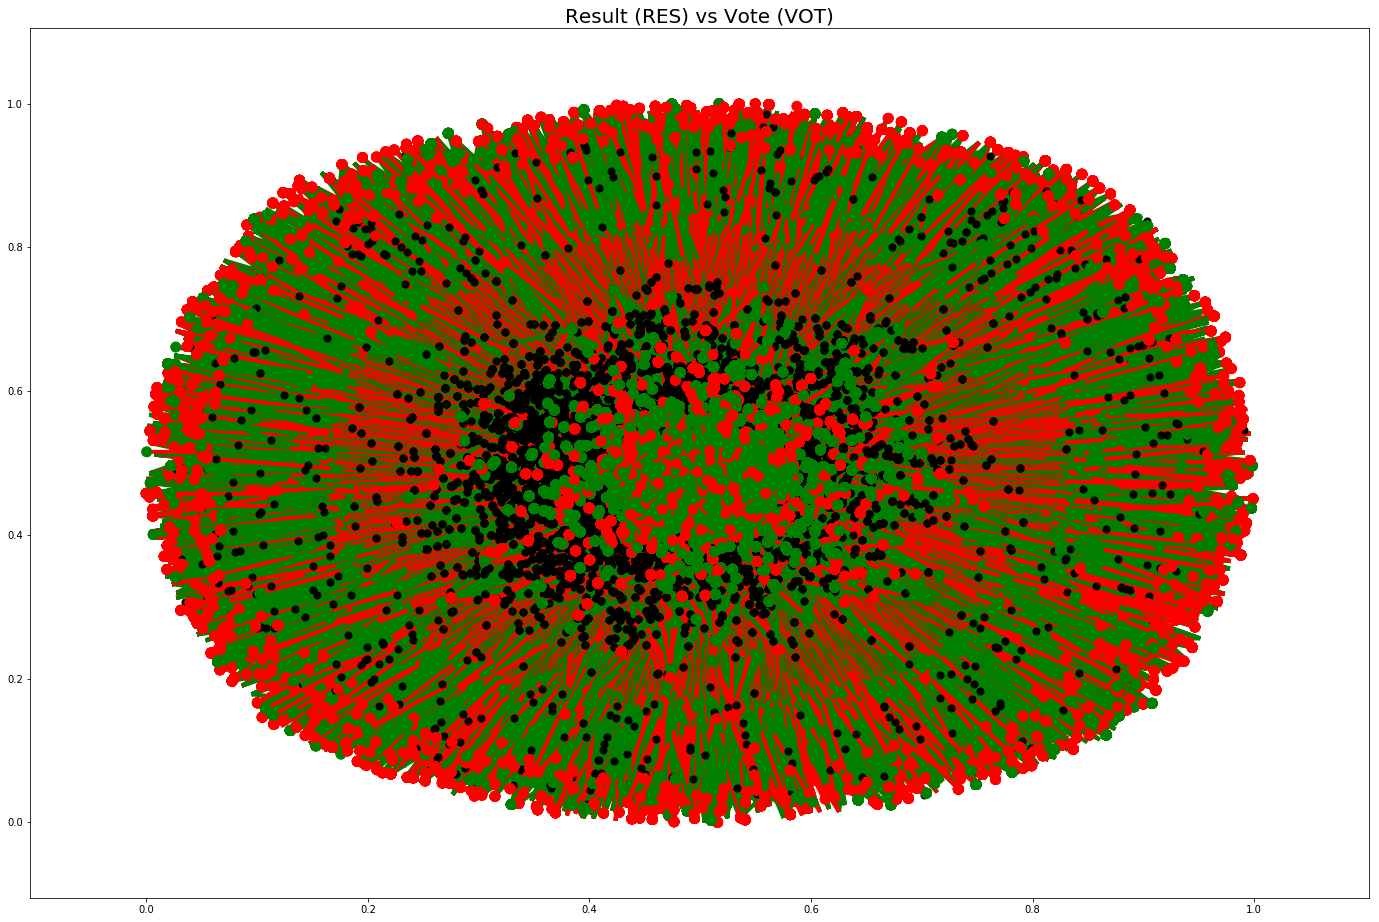

In [114]:
# Converting DataFrame to a Directional Graph object
Gwik_res = nx.from_pandas_dataframe(df, 'SRC', 'TGT', edge_attr=['color_VOT','color_RES'], create_using=nx.DiGraph())

# Mapping node names to integer values
Gwik_res = nx.convert_node_labels_to_integers(Gwik_res)

# Setting the figure size
plt.figure(figsize=(24, 16))

# Collecting edge data for coloring from 'color_VOT' and 'color_RES' attributes of Gwik_res graph object
edges = Gwik_res.edges()
colors_VOT = [Gwik_res[u][v]['color_VOT'] for u,v in edges]
colors_RES = [Gwik_res[u][v]['color_RES'] for u,v in edges]

# Extracting a list of source and target node names from graph_object.edges()
target = []
source = []
for i in Gwik_res.edges():
    src, tgt = i
    target.append(tgt)
    source.append(src)

# Plot - Vote (VOT) vs Result (RES)
nx.draw_networkx(Gwik_res, nodelist = source, with_labels=False, node_color = 'k', edge_color=colors_VOT, node_size=50)

nx.draw_networkx(Gwik_res, nodelist = target, with_labels=False, node_color = colors_RES, edge_color=colors_VOT, node_size=100)

plt.title("Result (RES) vs Vote (VOT)", fontsize=20)
plt.legend()

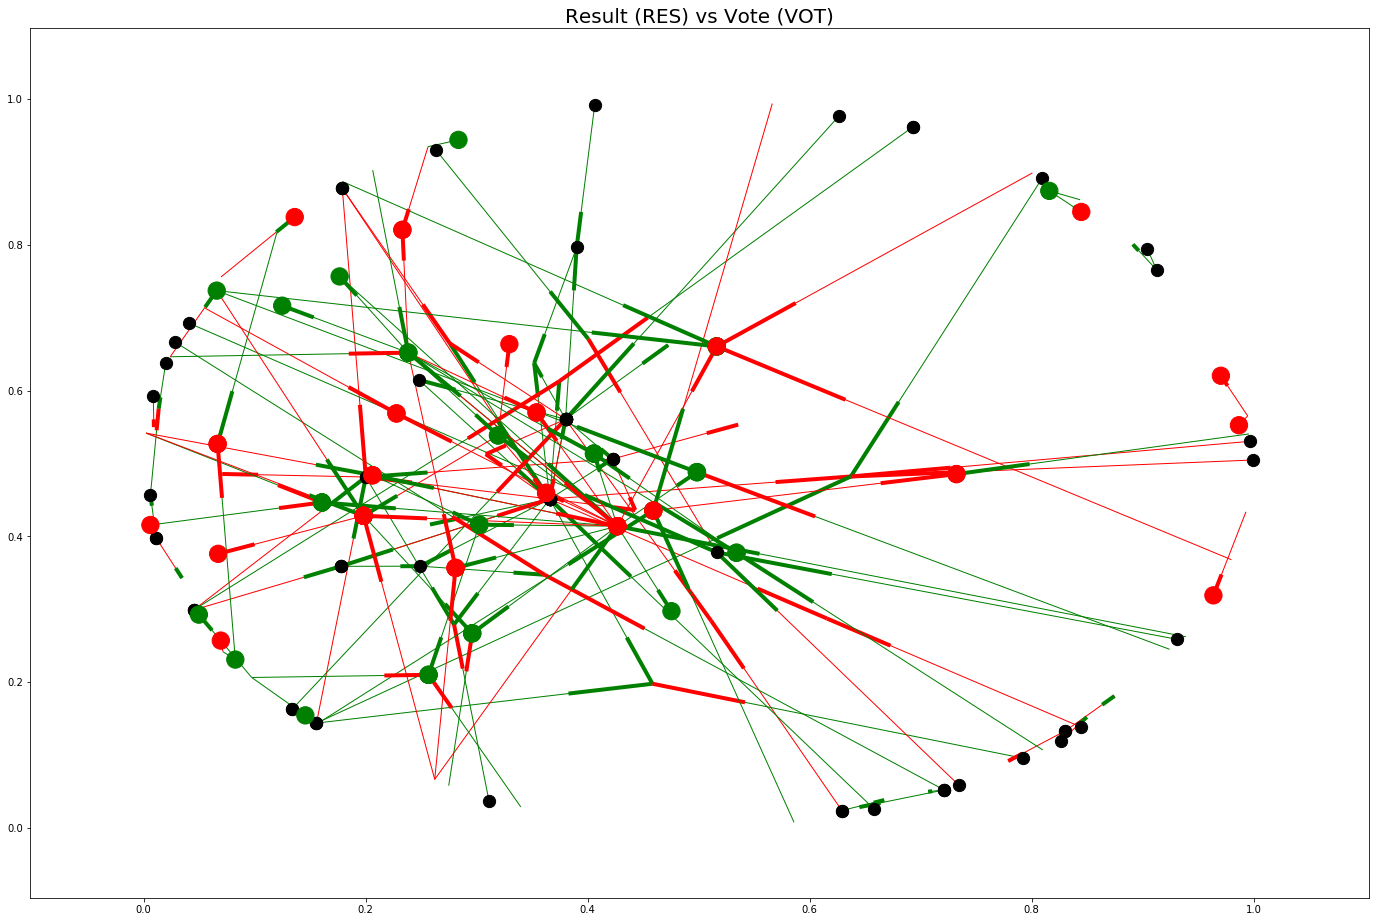

In [113]:
### Plotting subgraph of 250 random nodes for Vote (VOT) and Result (RES)

# Converting DataFrame to a Directional Graph object
Gwik_res = nx.from_pandas_dataframe(df, 'SRC', 'TGT', edge_attr=['color_VOT','color_RES'], create_using=nx.DiGraph())

# Mapping node names to integer values
Gwik_res = nx.convert_node_labels_to_integers(Gwik_res)

plt.figure(figsize=(24, 16))
plt.title("VOT vs RES")

# Generation of random integers
small_list = list(np.random.randint(0, len(Gwik_res.nodes()), size = 250))
# Creating subgraphs
Hwik_res = Gwik_res.subgraph(small_list)

# Collecting edge data for coloring from 'color_VOT' and 'color_RES' attributes of Gwik_res graph object
edges = Hwik_res.edges()
colors_VOT = [Hwik_res[u][v]['color_VOT'] for u,v in edges]
colors_RES = [Hwik_res[u][v]['color_RES'] for u,v in edges]

# Extracting a list of source and target node names from graph_object.edges()
target = []
source = []
for i in Hwik_res.edges():
    src, tgt = i
    target.append(tgt)
    source.append(src)

# Plotting the subgraph
nx.draw_networkx(Hwik_res, nodelist = source, with_labels=False, node_color = 'k', edge_color=colors_VOT, node_size=150)

nx.draw_networkx(Hwik_res, nodelist = target, with_labels=False, node_color = colors_RES, edge_color=colors_VOT, node_size=300)
plt.title("Result (RES) vs Vote (VOT)", fontsize=20)
plt.legend()

<p>
<span style="color:red">
The original figure seems a bit too cluttered so the subgraph depicts a clearer picture. The figure represents the color of target nodes as 'red' or 'green' depending on the result they received (red for -ve and green for +ve). The edges from the source nodes represent the vote given by each member (again red for -ve and green for +ve). In this way, we can visualize the voting pattern by looking at the edges and visualize the final result by looking at the target nodes's color. We can clearly observe the voting pattern on some nodes - large number of negative votes leading to a negative result and vice-versa. However, the subgraph contains only a small number of nodes and may give an incomplete picture in some areas. 
</span>
</p>